<a href="https://colab.research.google.com/github/patharepremkumar/Project-/blob/main/Car_Brand_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/Datasets.zip

Archive:  /content/Datasets.zip
   creating: Datasets/Test/
   creating: Datasets/Test/audi/
  inflating: Datasets/Test/audi/21.jpg  
  inflating: Datasets/Test/audi/22.jpg  
  inflating: Datasets/Test/audi/23.jpg  
  inflating: Datasets/Test/audi/24.jpg  
  inflating: Datasets/Test/audi/25.jpg  
  inflating: Datasets/Test/audi/26.jpg  
  inflating: Datasets/Test/audi/27.jpg  
 extracting: Datasets/Test/audi/28.jpg  
  inflating: Datasets/Test/audi/29.jpg  
   creating: Datasets/Test/lamborghini/
  inflating: Datasets/Test/lamborghini/1.jpg  
  inflating: Datasets/Test/lamborghini/10.jpg  
  inflating: Datasets/Test/lamborghini/11.jpg  
  inflating: Datasets/Test/lamborghini/12.jpg  
  inflating: Datasets/Test/lamborghini/13.jpg  
  inflating: Datasets/Test/lamborghini/14.jpg  
  inflating: Datasets/Test/lamborghini/15.jpg  
  inflating: Datasets/Test/lamborghini/16.jpg  
  inflating: Datasets/Test/lamborghini/17.jpg  
  inflating: Datasets/Test/lamborghini/18.jpg  
  inflating: Datase

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
image_size=[224,224]
train_path = '/content/Datasets/Train'
valid_path = '/content/Datasets/test'

In [ ]:
#include_top=False because resnet has 1000 classes and my dataset has only 3. also we are providing different i/p
resenet = ResNet50(input_shape=image_size+[3],weights='imagenet',include_top=False)

In [ ]:
resenet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
for layer in resenet.layers:
  layer.trainable=False

In [ ]:
#usefule in getting number of classes
folder = glob('/content/Datasets/Train/*')
folder

['/content/Datasets/Train/audi',
 '/content/Datasets/Train/lamborghini',
 '/content/Datasets/Train/mercedes']

In [ ]:
x=Flatten()(resenet.output)

In [ ]:
prediction = Dense(len(folder),activation='softmax')(x)
model = Model(inputs=resenet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/40
2/2 [==============================] - 1s 710ms/step - loss: 0.8713 - accuracy: 0.6562 - val_loss: 2.7886 - val_accuracy: 0.1552
Epoch 2/40
2/2 [==============================] - 1s 626ms/step - loss: 2.4329 - accuracy: 0.4375 - val_loss: 1.8041 - val_accuracy: 0.3448
Epoch 3/40
2/2 [==============================] - 1s 619ms/step - loss: 1.1251 - accuracy: 0.5156 - val_loss: 1.6387 - val_accuracy: 0.5345
Epoch 4/40
2/2 [==============================] - 1s 698ms/step - loss: 1.3689 - accuracy: 0.5469 - val_loss: 1.7081 - val_accuracy: 0.5690
Epoch 5/40
2/2 [==============================] - 1s 628ms/step - loss: 1.6366 - accuracy: 0.5625 - val_loss: 1.1207 - val_accuracy: 0.6207
Epoch 6/40
2/2 [==============================] - 1s 625ms/step - loss: 0.6520 - accuracy: 0.7344 - val_loss: 1.6855 - val_accuracy: 0.3966
Epoch 7/40
2/2 [==============================] - 1s 659ms/step - loss: 1.0690 - accuracy: 0.6250 - val_loss: 1.4300 - val_accuracy: 0.4655
Epoch 8/40
2/2 [====

In [ ]:
r.history

{'accuracy': [0.65625,
  0.4375,
  0.515625,
  0.546875,
  0.5625,
  0.734375,
  0.625,
  0.71875,
  0.625,
  0.75,
  0.75,
  0.6875,
  0.84375,
  0.796875,
  0.890625,
  0.765625,
  0.875,
  0.78125,
  0.859375,
  0.859375,
  0.875,
  0.859375,
  0.921875,
  0.921875,
  0.9375,
  0.921875,
  0.984375,
  0.90625,
  0.96875,
  0.9375,
  0.921875,
  0.953125,
  0.9375,
  0.96875,
  0.875,
  0.96875,
  0.953125,
  0.953125,
  0.953125,
  0.921875],
 'loss': [0.8712605834007263,
  2.432901620864868,
  1.125084400177002,
  1.3689136505126953,
  1.6366307735443115,
  0.652028501033783,
  1.0690144300460815,
  0.5773828029632568,
  0.7810677289962769,
  0.702642560005188,
  0.5213996767997742,
  0.6386885643005371,
  0.44871482253074646,
  0.5227748155593872,
  0.3377072811126709,
  0.4623676538467407,
  0.31889644265174866,
  0.43876147270202637,
  0.3458455801010132,
  0.29238465428352356,
  0.3141736388206482,
  0.3668612241744995,
  0.25402510166168213,
  0.2724939286708832,
  0.287663817

In [ ]:
from tensorflow.keras.models import load_model
model.save('carbrand_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1,
       0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1,
       1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0])

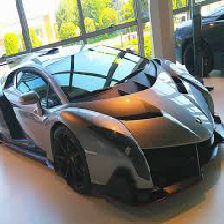

In [ ]:
img = image.load_img('/content/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))
img

In [ ]:
img = image.img_to_array(img)
img

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [ ]:
x = img/255

In [ ]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.00307677, 0.11730764, 0.8796156 ]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a

array([2])

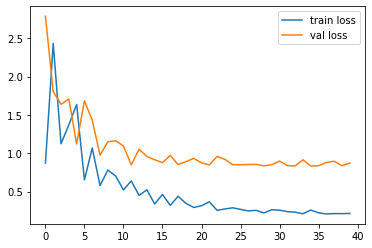

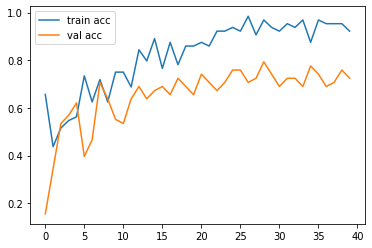

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')